# Part II - (Ford Go-Bike System Exploration)
## by (Emna Krichene)

## Investigation Overview

<br>
<li> In Ford Go-Bike System data, 74.5% of users are Male, Females represent 23.41% of users, whereas other gender represents 2.08% of data.
<li>  90.47% of users are subscribers.
<li> For all investigations, Male take less time.
<li> Users who start their trip in early morning take less time to reach their end station.
<li> Most user ages are around 30 and 40 years old.


## Dataset Overview

> This work explores Ford Go-Bike System Dataset including user type, gender member, duration and starting date. This data set includes information about 183412 rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df=pd.read_csv('gobike_clean.csv')

## (Visualization 1) Distribution of ages per gender

We notice in this graph that most ages are between 30 and 40 for all genders, followed by ages between 20 and 30 and ages between 40 and 50 with a slight difference between men and women.

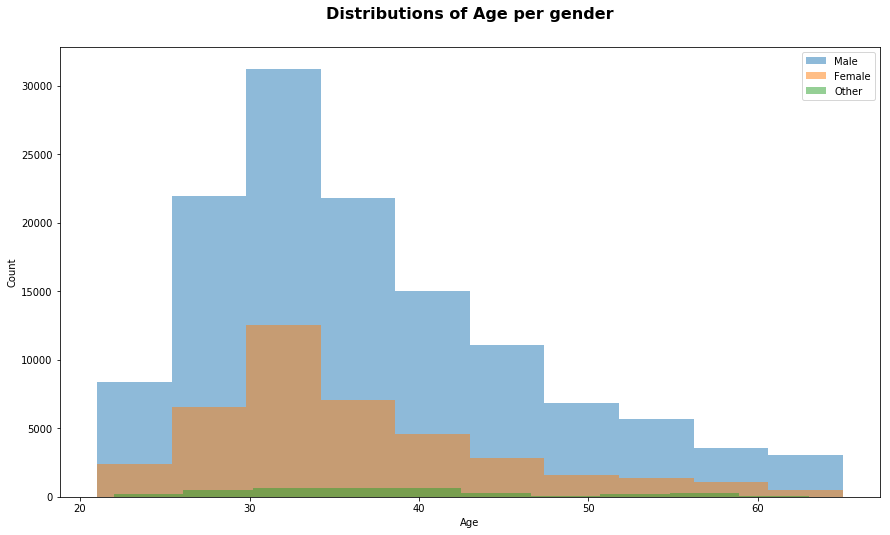

In [3]:
#we create 3 dataframes: one for each gender
df_male = df[df['member_gender'] == 'Male']
df_female = df[df['member_gender'] == 'Female']
df_others = df[df['member_gender'] == 'Other']
#we plot the distribution of age for each gender
fig, ax = plt.subplots(figsize =(14.70, 8.27))
ax.hist(df_male['age'], alpha=0.5, label='Male')
ax.hist(df_female['age'], alpha=0.5, label='Female')
ax.hist(df_others['age'], alpha=0.5, label='Other')
ax.set_title('Distributions of Age per gender', y=1.05, fontsize=16, fontweight='bold')
ax.set_xlabel('Age')
ax.set_ylabel('Count')
ax.legend(loc='upper right')

plt.show();

## (Visualization 2) The influence of  hour start time on the duration trip

> Most trips take less than 15 minutes, except 2 kind of trips: Ones that start at 3AM take much more time, whereas trips that start at 6AM take the shortest duration. 

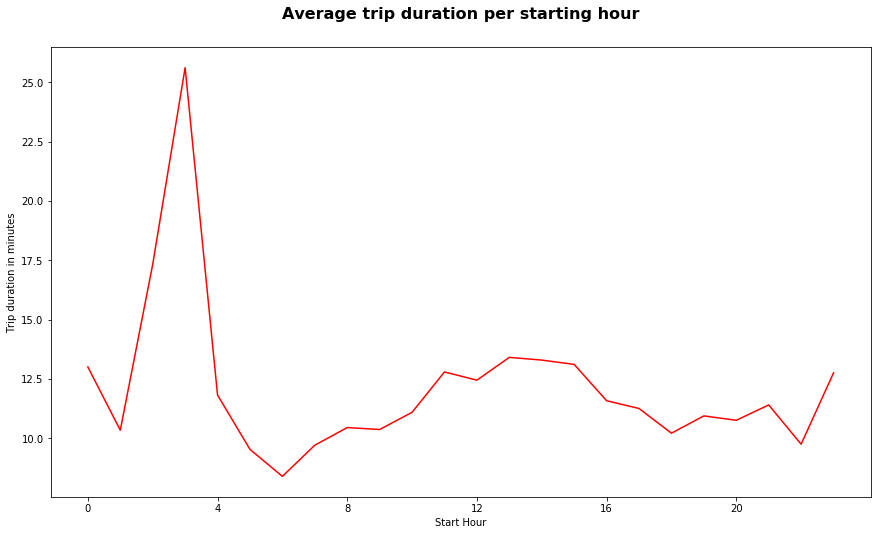

In [4]:
# We extract the hour of start
df['hour']=df['start_time_time'].apply(lambda x:x.split(":")[0])
df['hour']=df['hour'].astype(int)
df_duration_hours=df.groupby('hour')['duration_min'].mean()
df_duration_hours.plot(figsize=(14.70, 8.27) ,color='red')
plt.title('Average trip duration per starting hour', y=1.05, fontsize=16, fontweight='bold')
plt.ylabel('Trip duration in minutes')
plt.xlabel('Start Hour')
x_labels=[x for x in range(0,23,4)]
plt.xticks(x_labels)
plt.yticks(rotation=360);
plt.show()

## (Visualization 3) Does the session start time afffect the duration trip?

> This graph further justifies what we noticed in research question 6. We remark that when trips start during late night they took more time to reach their distinations. As we said in RQ 6, the maximum duration time was recoded between 2 and 3 AM.

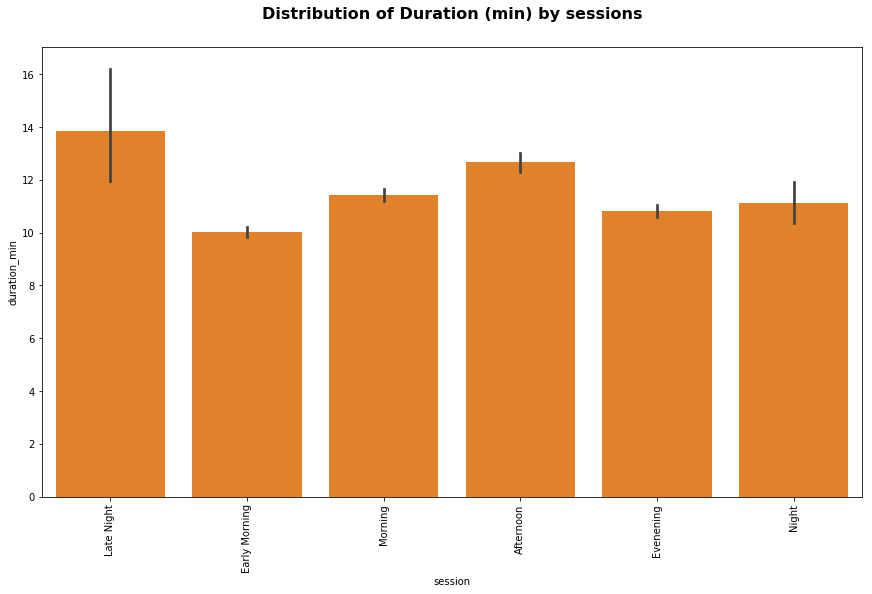

In [5]:
# splitting data into 4 internals: Late Night', 'Early Morning','Morning','Afternoon','Evenening','Night depending on the start hour
b = [0,4,8,12,16,20,24]
l = ['Late Night', 'Early Morning','Morning','Afternoon','Evenening','Night']
plt.figure(figsize=[14.70, 8.27])
# adding a column where we define the corresponding session of start
df['session']=pd.cut(df['hour'], bins=b, labels=l, include_lowest=True)
#we visualize the obtained result to communicate better our findings
sb.barplot(data = df, x='session', y='duration_min', color = sb.color_palette()[1])
plt.xticks(rotation=90);

plt.title("Distribution of Duration (min) by sessions", y=1.05, fontsize=16, fontweight='bold');

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_Ford_Go_Bike.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_Ford_Go_Bike.ipynb to slides
[NbConvertApp] Writing 356243 bytes to Part_II_slide_deck_Ford_Go_Bike.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_Ford_Go_Bike.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 77

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 